<a href="https://colab.research.google.com/github/KhandokerSamiulHoque/BAN-LAB-PROJECT/blob/main/BAN_PROJECT_METHOD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from google.colab import drive

register_matplotlib_converters()
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def load_data():
    # Load data
    df = pd.read_csv('/content/drive/MyDrive/fcc-forum-pageviews.csv', index_col="date", parse_dates=True)
    return df

In [8]:
def filter_data(df):
    # Filter data
    df_filtered = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
    return df_filtered

In [9]:
def draw_line_plot(df):
    # Draw line plot
    fig, ax = plt.subplots(figsize=(16, 4), dpi=150)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot(data=df, legend=False, palette=['r'])
    fig.savefig('Page_view_line_plot.png')

In [10]:
def draw_bar_plot(df):
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()
    df_bar.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Draw bar plot
    fig = df_bar.plot(kind='bar', figsize=(12, 10)).figure
    plt.xlabel('Years', fontsize=12)
    plt.ylabel('Average Page Views', fontsize=13)
    plt.legend(loc='upper left', title='Months', fontsize=13)
    fig.savefig('Average_Page_Views_bar_plot.png')

In [11]:
def draw_box_plot(df):
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Define the order of months
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))  # Increase the width for landscape style
    sns.boxplot(data=df_box, ax=ax1, x="year", y="value")
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")

    sns.boxplot(data=df_box, ax=ax2, x="month", y="value", order=month_order)
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('Month-wise Box Plot.png')

In [12]:
df = load_data()
df_filtered = filter_data(df)


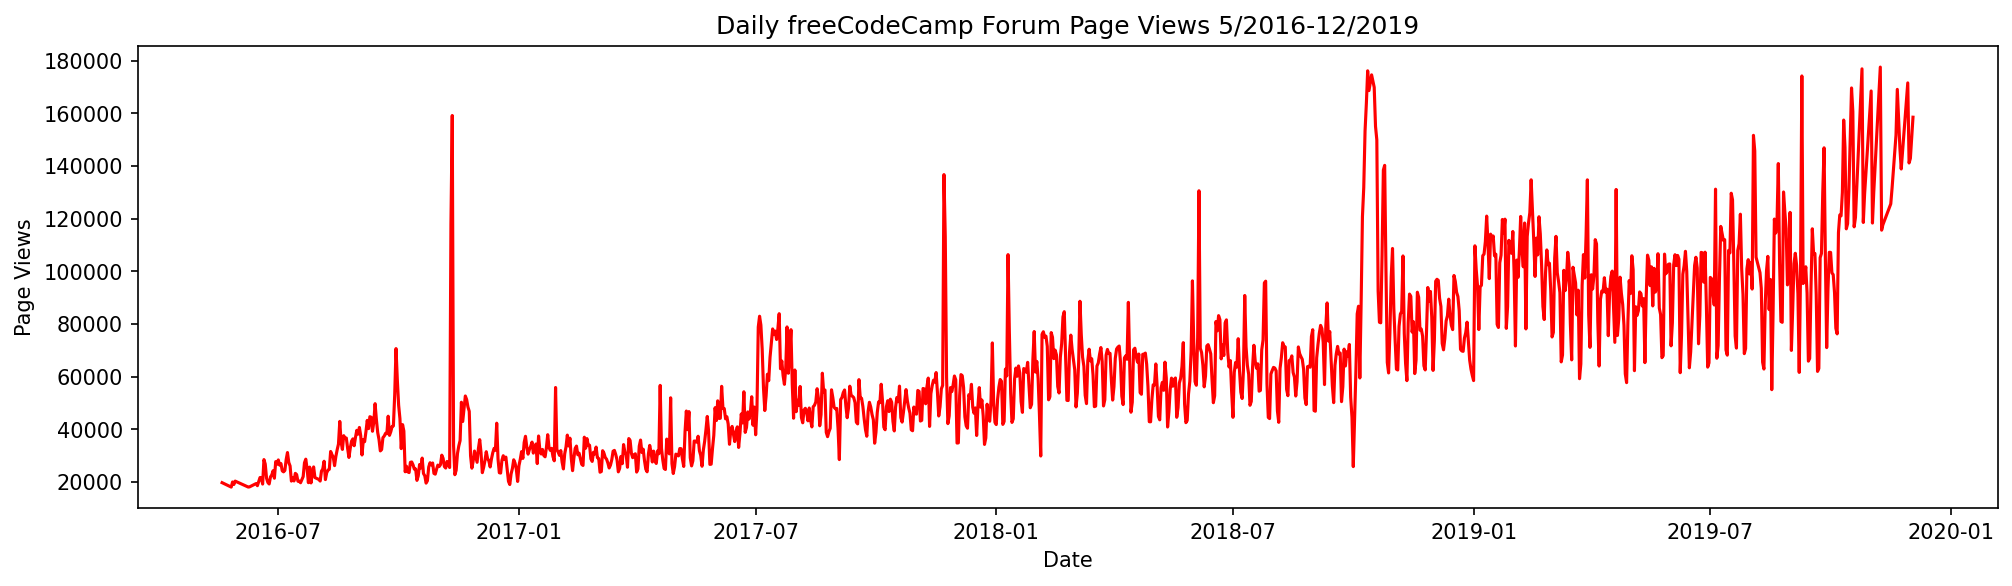

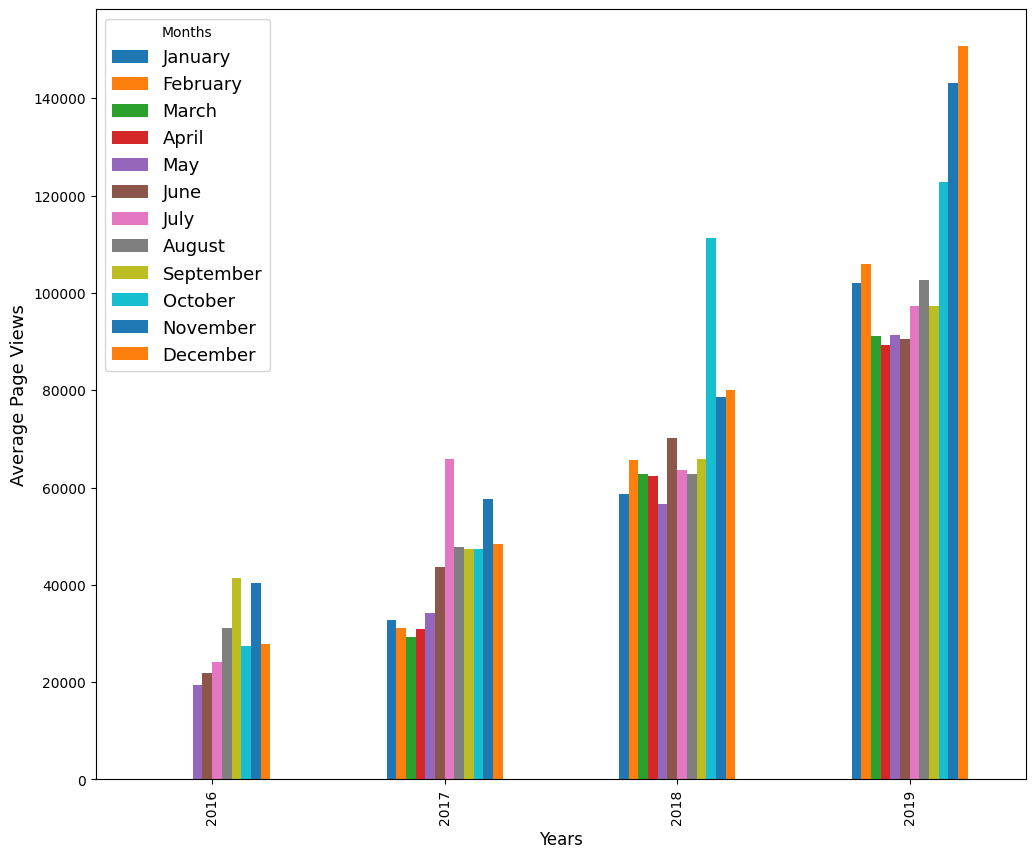

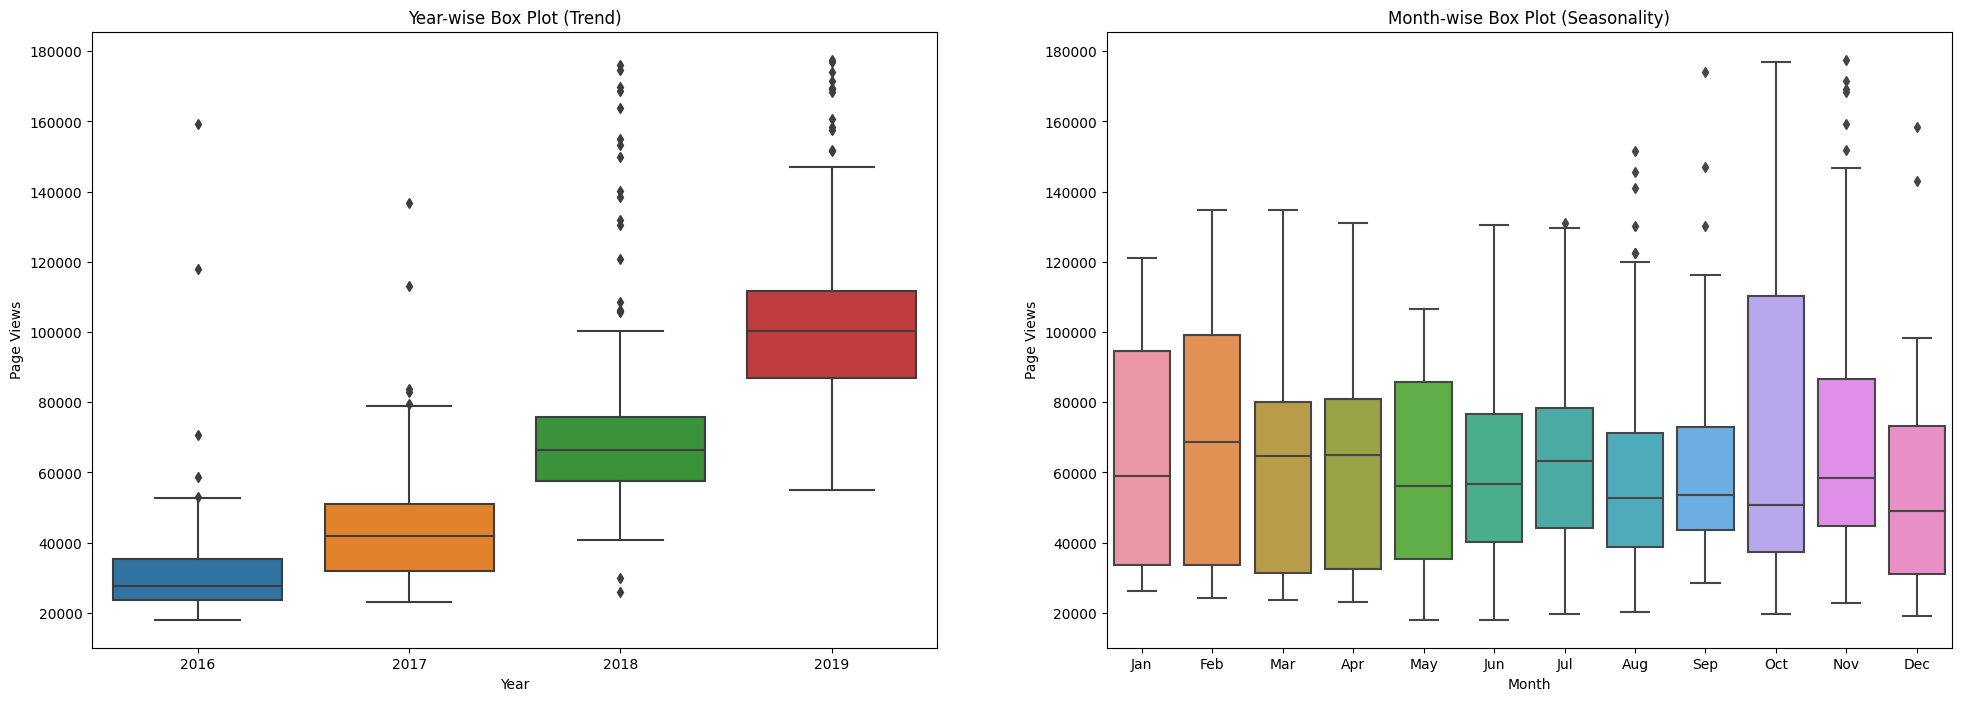

In [13]:
# Draw plots
draw_line_plot(df_filtered)
draw_bar_plot(df_filtered)
draw_box_plot(df_filtered)